In [2]:
from fermi_model import *
%matplotlib inline
states3 = csv_to_states()

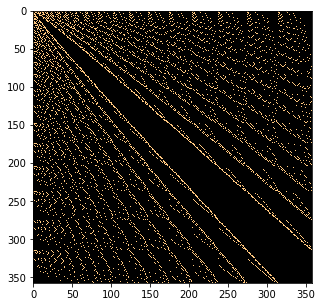

In [3]:
Fermi.show_adj_matrix(Fermi(states3), figsize=(5,5))

# 電子数3, lim_size20

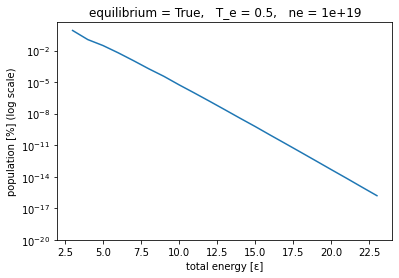

In [8]:
# 放射脱励起の影響を無視している(平衡状態)
equ = True
Te = 0.5
ne = 1e+19
fermi3 = Fermi(states3, equ=equ, Te=Te, ne=ne)
scores, population = fermi3.get_distribution(use_power=True)
x = fermi3._solve_equation()
plot(scores, population, equ, Te, ne)

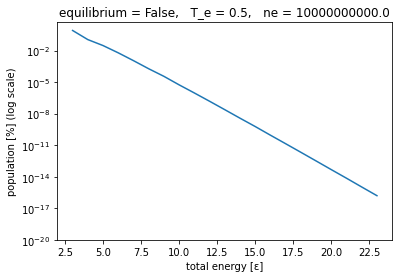

In [9]:
# 放射脱励起の影響も考慮しているものの、neがまだまだ大きいので、放射脱励起を無視したときと変わらない

equ = False
Te = 0.5
ne = 1e+10
fermi3 = Fermi(states3, equ=equ, Te=Te, ne=ne)
scores, population = fermi3.get_distribution(use_power=True)
x = fermi3._solve_equation()
plot(scores, population, equ, Te, ne)

* Teが大きい == exp(...)が1に近づき、ほとんどneのみで決定されるようになるため、衝突励起が大きくなる
* Teが小さい == exp(...)が1よりもかなり小さくなり、neを1以上の値で割ることに等しくなり、衝突励起が小さくなる

* neが大きい == 衝突励起・脱励起が放射脱励起よりも優勢となる(平衡状態)
* neが小さい == 放射脱励起の効果が無視できなくなってくる

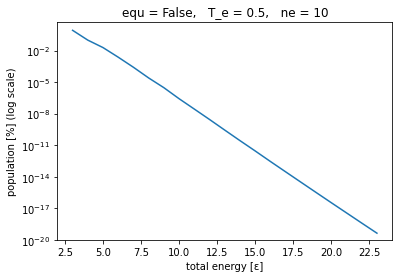

In [10]:
# neの値をかなり小さくして、放射脱励起の影響が現れてきた

equ = False
Te = 0.5
ne = 10
fermi3 = Fermi(states3, equ=equ, Te=Te, ne=ne)
scores, population = fermi3.get_distribution(use_power=True)
plt.plot(scores, population)
plt.title(f"equ = {equ},   T_e = {Te},   ne = {ne}")
plt.yscale("log")
plt.ylim(1e-20, 5)
plt.xlabel("total energy [ε]")
plt.ylabel("population [%] (log scale)")
plt.show()

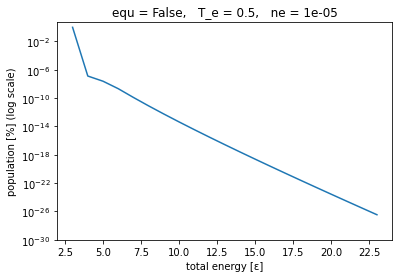

In [11]:
# neの値をかなり小さくして、放射脱励起の影響が現れてきた

equ = False
Te = 0.5
ne = 0.00001
fermi3 = Fermi(states3, equ=equ, Te=Te, ne=ne)
scores, population = fermi3.get_distribution(use_power=True)
plt.plot(scores, population)
plt.title(f"equ = {equ},   T_e = {Te},   ne = {ne}")
plt.yscale("log")
plt.ylim(1e-30, 5)
plt.xlabel("total energy [ε]")
plt.ylabel("population [%] (log scale)")
plt.show()

### Mixしてプロット

  0%|          | 0/8 [00:00<?, ?it/s]

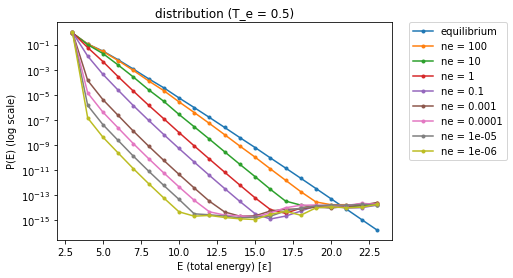

In [13]:
# 改修後(np.linalg.eig()で固有ベクトルを解く)
plots_dist([100, 10, 1, 0.1, 0.001, 0.0001, 0.00001, 0.000001], include_equ=True)

  0%|          | 0/8 [00:00<?, ?it/s]

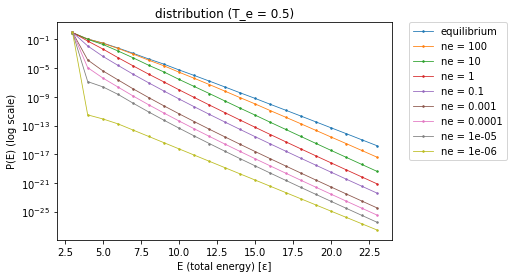

In [2]:
# 改修後(power_method()で固有ベクトルを解く)
# 実行に4分かかる
plots_dist([100, 10, 1, 0.1, 0.001, 0.0001, 0.00001, 0.000001], include_equ=True, use_power=True)

### 占有密度分布を平均したものをプロット

  0%|          | 0/8 [00:00<?, ?it/s]

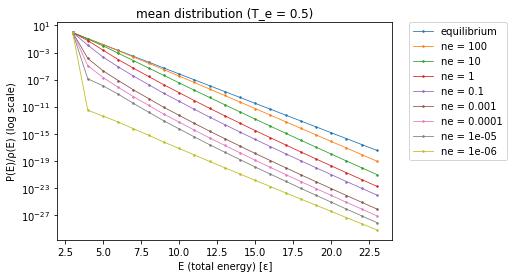

In [3]:
plots_mean_dist([100, 10, 1, 0.1, 0.001, 0.0001, 0.00001, 0.000001], include_equ=True, use_power=True)

0it [00:00, ?it/s]

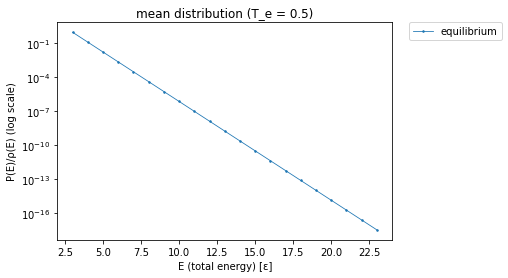

In [3]:
plots_mean_dist([], include_equ=True, use_power=True)

### 縮退状態を別々で考慮した占有密度をプロット

  0%|          | 0/8 [00:00<?, ?it/s]

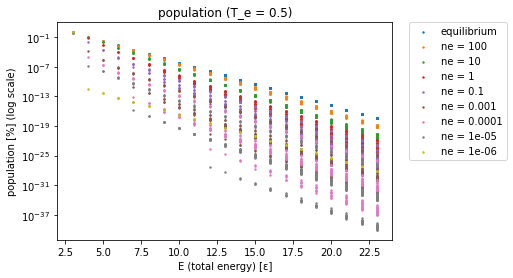

In [4]:
plots_poplulation([100, 10, 1, 0.1, 0.001, 0.0001, 0.00001, 0.000001], include_equ=True, use_power=True)

0it [00:00, ?it/s]

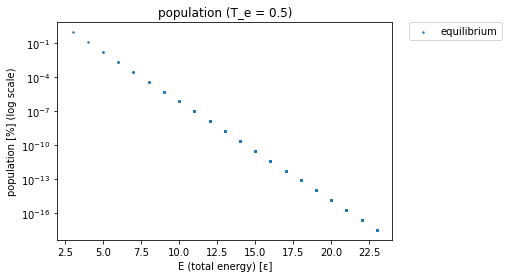

In [5]:
plots_poplulation([], include_equ=True, use_power=True)

  0%|          | 0/1 [00:00<?, ?it/s]

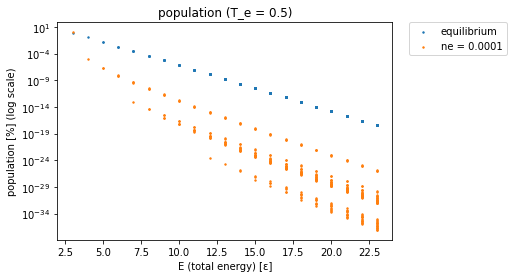

In [6]:
plots_poplulation([0.0001], include_equ=True, use_power=True)

# ここからはべき乗法を修正する前の実験結果であることに注意    

## 各neにおけるpopulation(log)に対するtotal energyの傾きをフィッティング

In [ ]:

def solve_normal_equation(xs: NDArray, ys: NDArray):
    x_ave = xs.mean()
    y_ave = ys.mean()
    cov = np.sum((xs - x_ave) * (ys - y_ave))
    var = np.sum((xs - x_ave)**2)
    slope = cov / var
    return slope

## 正規方程式で解いたものの正しさ検証

In [ ]:
def solve_normal_equation_with_intercept(xs: NDArray, ys: NDArray):
    x_ave = xs.mean()
    y_ave = ys.mean()
    cov = np.sum((xs - x_ave) * (ys - y_ave))
    var = np.sum((xs - x_ave)**2)
    slope = cov / var
    intercept = y_ave - x_ave * slope
    return slope, intercept

In [ ]:
# Te = 0.5
# ne = 0.00394
# fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
# scores, population = fermi.get_distribution()
# slope, intercept = solve_normal_equation_with_intercept(scores[3:], np.log(population[3:]))

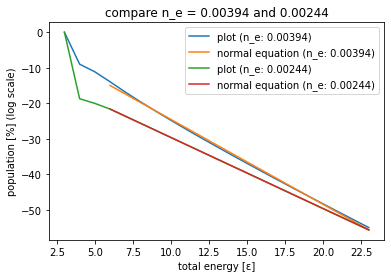

In [ ]:
Te = 0.5
for ne in [0.00394, 0.00244]:
    fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
    scores, population = fermi.get_distribution()
    slope, intercept = solve_normal_equation_with_intercept(scores[3:], np.log(population[3:]))
    plt.plot(scores, np.log(population), label=f"plot (n_e: {ne})")
    plt.plot(scores[3:], scores[3:]*slope+intercept, label=f"normal equation (n_e: {ne})")
    plt.legend()
plt.title(f"compare n_e = 0.00394 and 0.00244")
plt.xlabel("total energy [ε]")
plt.ylabel("population [%] (log scale)")
plt.show()

In [ ]:
Te = 0.5
ne = 0.00244
fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
scores, population = fermi.get_distribution()
slope, intercept = solve_normal_equation_with_intercept(scores[3:], np.log(population[3:]))

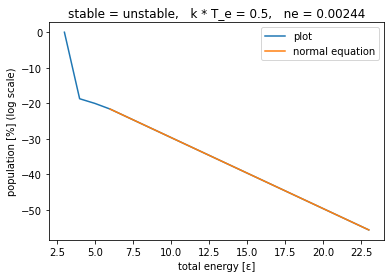

In [ ]:
plt.plot(scores, np.log(population), label="plot")
plt.plot(scores[3:], scores[3:]*slope+intercept, label="normal equation")
plt.legend()
plt.title(f"equ = unequ,   T_e = {Te},   ne = {ne}")
# plt.ylim(1e-30, 5)
plt.xlabel("total energy [ε]")
plt.ylabel("population [%] (log scale)")
plt.show()

### 正しいことがわかった

In [ ]:
ne_lst = [
   1e+3, 600, 400, 300, 200, 100, 80, 50, 30, 10, 1, 0.5, 1e-01, 0.05, 1e-02, 1e-03, 7e-05, 4e-05, 3e-05, 
    2.7e-05, 2.5e-05, 2.45e-05, 2e-05, 1e-05,
]

states3 = csv_to_states()
Te = 0.5
Tex_lst = []
for ne in tqdm(ne_lst):
    fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
    scores, population = fermi.get_distribution()
    Tex = - solve_normal_equation(np.log(population[3:]), scores[3:])
    Tex_lst.append(Tex)


  0%|          | 0/24 [00:00<?, ?it/s]

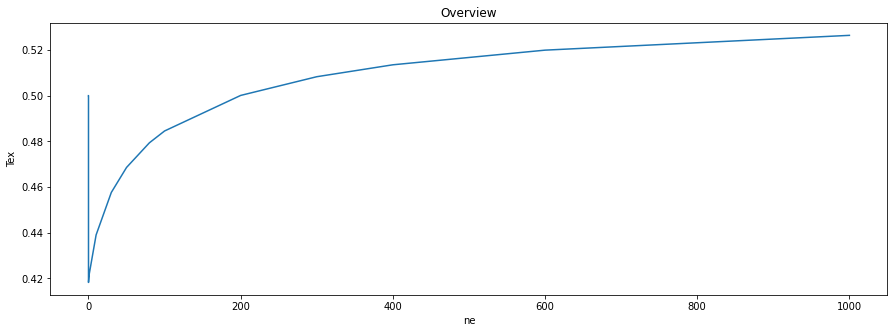

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Overview")
plt.xlabel("ne")
plt.ylabel("Tex")
plt.plot(ne_lst, Tex_lst)


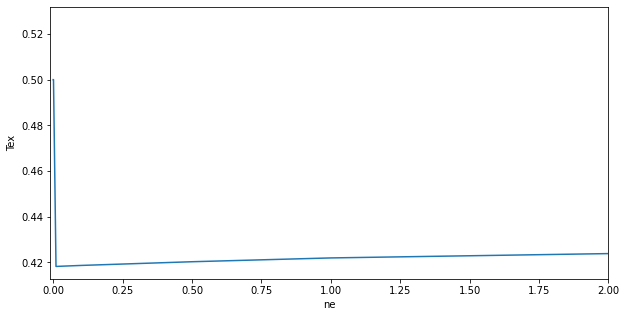

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(ne_lst, Tex_lst)
plt.xlim(-0.01, 2)
plt.xlabel("ne")
plt.ylabel("Tex")
plt.show()

In [ ]:
Tex_dict = {ne: Tex for ne, Tex in zip(ne_lst, Tex_lst)}
Tex_dict

{1000.0: 0.5263724474614991,
 600: 0.5198986551207853,
 400: 0.5134885016169235,
 300: 0.5082734914528854,
 200: 0.500089393449245,
 100: 0.4845363569945829,
 80: 0.4793478683947906,
 50: 0.46857391665741016,
 30: 0.45764334581083854,
 10: 0.4390428104486281,
 1: 0.4219817561704033,
 0.5: 0.4203169860123582,
 0.1: 0.4186957937459126,
 0.05: 0.41845673636854364,
 0.01: 0.4182557568008907,
 0.001: 0.5000000000000001,
 7e-05: 0.5,
 4e-05: 0.49999999999999994,
 3e-05: 0.5,
 2.7e-05: 0.5,
 2.5e-05: 0.5000000000000001,
 2.45e-05: 0.49999999999999994,
 2e-05: 0.5,
 1e-05: 0.5000000000000001}

### 上の部分

In [ ]:
# neのデータを差し替える
ne_lst_upper = [
    1e+3, 600, 400, 300, 200, 100, 80, 50, 30, 10, 1
]

# states3 = csv_to_states()
Te = 0.5
Tex_lst_upper = []
for ne in tqdm(ne_lst_upper):
    fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
    scores, population = fermi.get_distribution()
    Tex = - solve_normal_equation(np.log(population[3:]), scores[3:])
    Tex_lst_upper.append(Tex)

  0%|          | 0/11 [00:00<?, ?it/s]

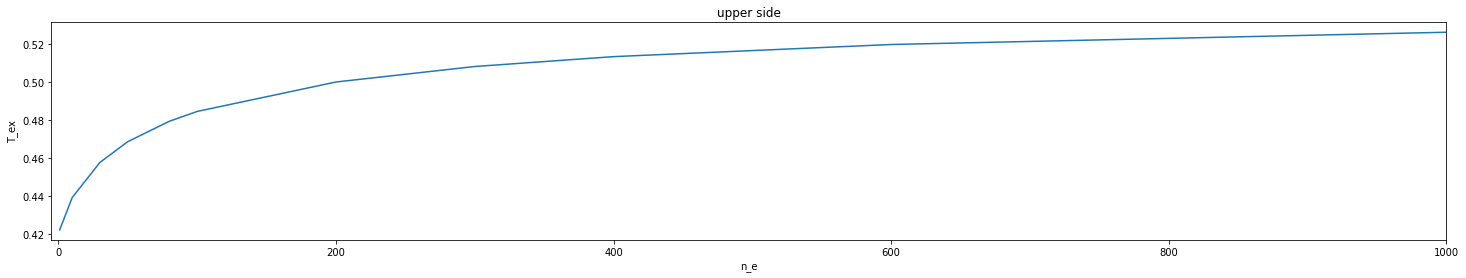

In [ ]:
plt.figure(figsize=(25, 4))
plt.plot(ne_lst_upper, Tex_lst_upper)
plt.title("upper side")
plt.xlabel("n_e")
plt.ylabel("T_ex")
plt.xlim(-5, 1e+3)
plt.show()

### 極小値の部分

In [ ]:
# neのデータを差し替える
ne_lst_middle_upper = np.arange(start=0.0050, stop=0.0035, step=-0.00002)

# states3 = csv_to_states()
Te = 0.5
Tex_lst_middle_upper = []
for ne in tqdm(ne_lst_middle_upper):
    fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
    scores, population = fermi.get_distribution()
    Tex = - solve_normal_equation(np.log(population[3:]), scores[3:])
    Tex_lst_middle_upper.append(Tex)

  0%|          | 0/75 [00:00<?, ?it/s]

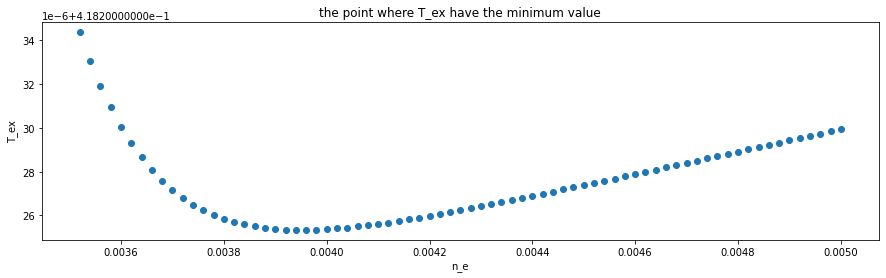

In [ ]:
plt.figure(figsize=(15, 4))
plt.scatter(ne_lst_middle_upper, Tex_lst_middle_upper)
plt.title("the point where T_ex have the minimum value")
plt.xlabel("n_e")
plt.ylabel("T_ex")
plt.show()

In [ ]:
print(f"when n_e is '{ne_lst_middle_upper[np.argmin(Tex_lst_middle_upper)]}', T_ex have the minimum value.")

0.003939999999999997

### 平行になる手前の部分

In [ ]:
# neのデータを差し替える
# ne_lst_middle = np.arange(start=0.01, stop=0.00, step=-0.001)
# ne_lst_middle = np.arange(start=0.003, stop=0.002, step=-0.0001)
ne_lst_middle = np.arange(start=0.0027, stop=0.0024, step=-0.000005)
# ne_lst_middle = np.arange(start=0.0035, stop=0.0024, step=-0.00001)

# states3 = csv_to_states()
Te = 0.5
Tex_lst_middle = []
for ne in tqdm(ne_lst_middle):
    fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
    scores, population = fermi.get_distribution()
    Tex = - solve_normal_equation(np.log(population[3:]), scores[3:])
    Tex_lst_middle.append(Tex)

  0%|          | 0/61 [00:00<?, ?it/s]

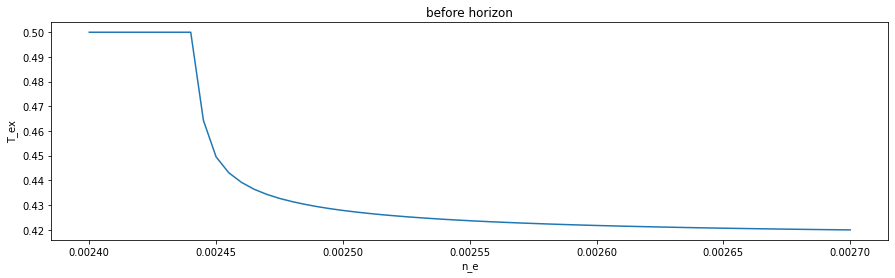

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(ne_lst_middle, Tex_lst_middle)
plt.title("before horizon")
plt.xlabel("n_e")
plt.ylabel("T_ex")
plt.show()

In [ ]:
Tex_dict_middle = {ne: Tex for ne, Tex in zip(ne_lst_middle, Tex_lst_middle)}
# Tex_dict_middle
{ne: Tex for ne, Tex in Tex_dict_middle.items() if Tex >= 0.428}

# →neが0.00244あたりで急激に変わる

{0.0024950000000000085: 0.4285039083774489,
 0.0024900000000000087: 0.42932305833794127,
 0.002485000000000009: 0.4302801528713637,
 0.002480000000000009: 0.43136817282332635,
 0.0024750000000000093: 0.43267865737514216,
 0.0024700000000000095: 0.4342991131585772,
 0.0024650000000000097: 0.4363758659529585,
 0.00246000000000001: 0.4391788073823144,
 0.00245500000000001: 0.4430739443381208,
 0.0024500000000000103: 0.4495032310008226,
 0.0024450000000000105: 0.46429684869493687,
 0.0024400000000000107: 0.5,
 0.002435000000000011: 0.49999999999999994,
 0.002430000000000011: 0.5,
 0.0024250000000000113: 0.5000000000000001,
 0.0024200000000000116: 0.5,
 0.0024150000000000118: 0.5000000000000001,
 0.002410000000000012: 0.5,
 0.002405000000000012: 0.5,
 0.0024000000000000124: 0.5}

### 下の部分

In [ ]:
# neのデータを差し替える
ne_lst_lower = [
    0.00244, 1e-10
]

# states3 = csv_to_states()
Te = 0.5
Tex_lst_lower = []
for ne in tqdm(ne_lst_lower):
    fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
    scores, population = fermi.get_distribution()
    Tex = - solve_normal_equation(np.log(population[3:]), scores[3:])
    Tex_lst_lower.append(Tex)

  0%|          | 0/2 [00:00<?, ?it/s]

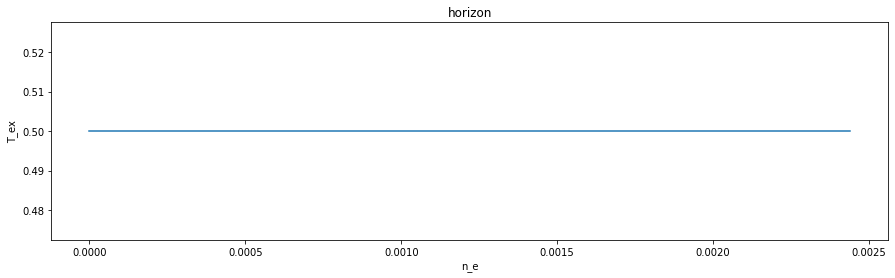

In [ ]:
plt.figure(figsize=(15, 4))
plt.plot(ne_lst_lower, Tex_lst_lower)
plt.title("horizon")
plt.xlabel("n_e")
plt.ylabel("T_ex")
plt.show()

### 結果
---
* $ n_e = 0.00394 $ で $ T_{ex} $ が上昇に転じる
* $ n_e = 0.00244 $ で $ T_{ex} $ が頭打ちになり、その後ずっと一定の値をとる

### これからやること
---
* $ n_e = [0.00394, 0.00244] $ での $ total  energy - \ln n_i $ のグラフがどうなっているのか確認する

  0%|          | 0/10 [00:00<?, ?it/s]

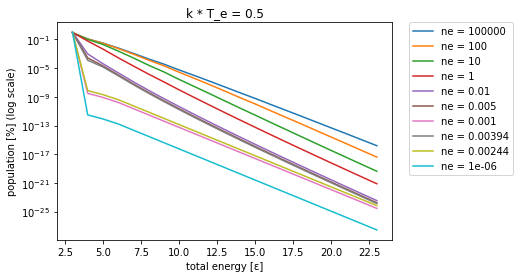

In [ ]:
Te = 0.5
plots_dist([100000, 100, 10, 1, 0.01, 0.005, 0.001, 0.00394, 0.00244, 1e-06])

  0%|          | 0/10 [00:00<?, ?it/s]

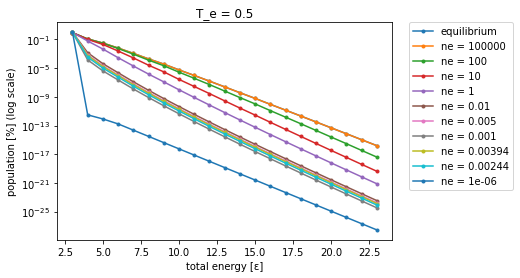

In [4]:
# after modified
plots_dist([100000, 100, 10, 1, 0.01, 0.005, 0.001, 0.00394, 0.00244, 1e-06], include_equ=True, use_power=True)

  0%|          | 0/9 [00:00<?, ?it/s]

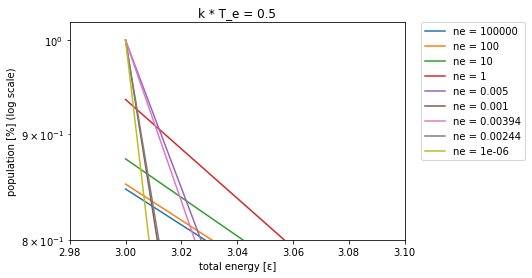

In [ ]:
# total energy の小さな値に注目
plots_dist([100000, 100, 10, 1, 0.005, 0.001, 0.00394, 0.00244, 1e-06], xlim=(2.98, 3.10), ylim=(0.8, 1.02))

## 多準位系(3電子)の数値計算結果と2準位系の解析結果を比較する
* 多準位系では電子の個数によってとり得るエネルギー状態が変わったりするので、電子数によってグラフの形が多少変化するが、2準位系ではエネルギー差しか見てないので、電子の個数は関係ない。

In [ ]:
def analytical_T_ex(dE: float = 1., Te: float = 0.5) -> list[float]:
    ne_lst = [
        1e+3, 600, 400, 300, 200, 100, 80, 50, 30, 10, 1, 0.5, 1e-01, 0.05, 1e-02, 1e-03, 7e-05, 4e-05, 3e-05, 
        2.7e-05, 2.5e-05, 2.45e-05, 2e-05, 1e-05,
    ]
    T_ex_lst = []
    for ne in ne_lst:
        T_ex = -dE/(np.log(ne/(dE**3 + ne)) - dE/Te)
        T_ex_lst.append(T_ex)
    return T_ex_lst

In [ ]:
analytical_T_ex_lst = analytical_T_ex(dE=1)
ne_lst = [
   1e+3, 600, 400, 300, 200, 100, 80, 50, 30, 10, 1, 0.5, 1e-01, 0.05, 1e-02, 1e-03, 7e-05, 4e-05, 3e-05, 
    2.7e-05, 2.5e-05, 2.45e-05, 2e-05, 1e-05,
]

states3 = csv_to_states()
Te = 0.5
Tex_lst = []
for ne in tqdm(ne_lst):
    fermi = Fermi(states3, equ=False, Te=Te, ne=ne)
    scores, population = fermi.get_distribution()
    Tex = - solve_normal_equation(np.log(population[3:]), scores[3:])
    Tex_lst.append(Tex)


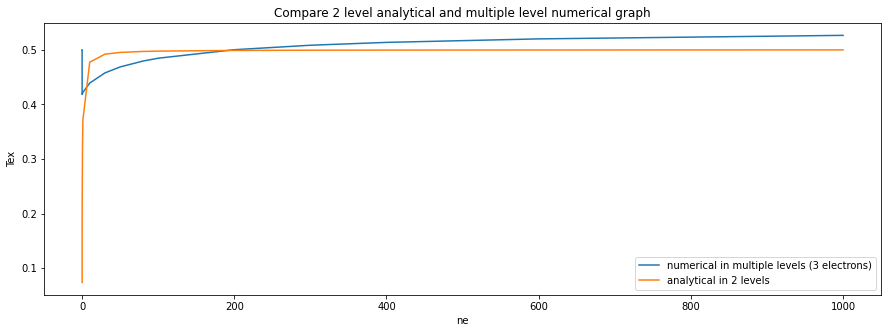

In [ ]:
plt.figure(figsize=(15, 5))
plt.title("Compare 2 level analytical and multiple level numerical graph")
plt.xlabel("ne")
plt.ylabel("Tex")
plt.plot(ne_lst, Tex_lst, label="numerical in multiple levels (3 electrons)")
plt.plot(ne_lst, analytical_T_ex_lst, label="analytical in 2 levels")
# plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0)
plt.legend()
plt.show()

### 結果
---
- $ n_e -> \infty $(平衡状態) のとき解析解は $ T_{ex} = k \cdot T_e (= 0.5)$ となるが、この事実と一致する
- ただ2準位系では多準位系(ここでは3電子)をうまく説明できているかと言われると微妙。ある程度の特徴は表わせてるけど。
  - この原因は何？2準位系ではすべて遷移可能なので、遷移不可能なルートが存在することを考慮に入れてないから？
- もう一つの疑問としては、多準位系で一回極小値とって跳ね上がるところ。ここが謎。
  - どんな$ n_e $の値で跳ね上がりが起こるかは、$k \cdot T_e$の値の取り方などにもよるので、あまり重要ではない。大切なのは、「他の値と比べたときの相対値として$n_e$がどんな値をとるのか」ということ。
  - なぜ跳ね上がるのかの物理的要因はなにか

### 考察
---
- なぜ跳ね上がるのか
  - $n_e$がこれよりも小さくなる衝突励起レートが放射脱励起レートに比べて小さくなりすぎることによって放射脱励起レートのみを考慮しているような状態になっている？
    - でもそれやったら２準位系にもそのような風潮が現れてくるはず。$n_e$が小さくなりすぎるとたぶん$T_{ex}$が0に収束していくのでは？
    - 2準位系を解析的に解くと、$n_e -> \infty$のとき$T_{ex} -> 0$に収束  
  <br>
  - 跳ね上がる = 占有密度分布の形が直線から折れ線に変わる
    - なぜ折れ線に変わる？


In [ ]:
fermi_1000 = Fermi(states3, equ=False, Te=Te, ne=1000)
fermi_1e06 = Fermi(states3, equ=False, Te=Te, ne=1e-06)

scores_1000, population_1000 = fermi_1000.get_distribution()
scores_1e06, population_1e06 = fermi_1e06.get_distribution()

In [ ]:
population_1000[0], population_1e06[0]

(0.8472397131917838, 0.9999999999959055)

# 電子数2, lim_size 1

In [ ]:
states2 = csv_to_states(path = './output/states2.csv')

# lim_size(上り幅)が1の時(二準位系)
def analytical_solution(equ: bool, Te: float, ne: float) -> NDArray[float]:
    a = ne * np.exp(-1/Te)
    b = ne if equ else ne+1
    return np.array([b/(a+b), a/(a+b)])

normalized_matrix does't include nagative value. (includes 0 value)


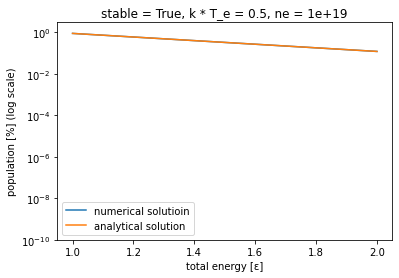

In [ ]:
# 放射脱励起の影響を無視している(定常状態)
equ = True
Te = 0.5
ne = 1e+19
fermi2 = Fermi(states2, equ=equ, Te=Te, ne=ne)
scores, population = fermi2.get_distribution()

# 解析解
analytical_population = analytical_solution(equ=equ, Te=Te, ne=ne)

plt.title(f"equ = {equ}, T_e = {Te}, ne = {ne}")
plt.plot(scores, population, label="numerical solutioin")
plt.plot(scores, analytical_population, label="analytical solution")
plt.legend()
plt.yscale("log")
plt.ylim(1e-10, 3)
plt.xlabel("total energy [ε]")
plt.ylabel("population [%] (log scale)")
plt.show()

normalized_matrix does't include nagative value. (includes 0 value)


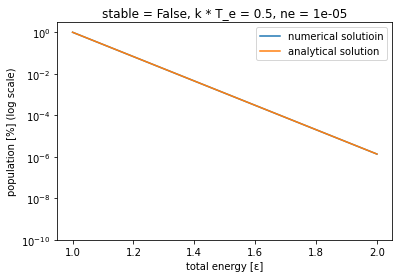

In [ ]:
# neの値をかなり小さくして、放射脱励起の影響が現れてきた

equ = False
Te = 0.5
ne = 0.00001

fermi2 = Fermi(states2, equ=equ, Te=Te, ne=ne)
scores, population = fermi2.get_distribution()

# 解析解
analytical_population = analytical_solution(equ=equ, Te=Te, ne=ne)

plt.title(f"equ = {equ}, T_e = {Te}, ne = {ne}")
plt.plot(scores, population, label="numerical solutioin")
plt.plot(scores, analytical_population, label="analytical solution")
plt.legend()
plt.yscale("log")
plt.ylim(1e-10, 3)
plt.xlabel("total energy [ε]")
plt.ylabel("population [%] (log scale)")
plt.show()

In [ ]:
for i in range(fermi2.num_states):
    for j in range(i+1, fermi2.num_states):
        if Fermi.is_connected(fermi2.states[i], fermi2.states[j]):
            # i→jの遷移
            fermi2.excitation[i, j] = fermi2.ne * np.exp(-(fermi2.states[j].score - fermi2.states[i].score)/fermi2.Te)
            # j→iの遷移
            fermi2.emission[i, j] = (fermi2.states[j].score - fermi2.states[i].score)**3

In [ ]:
population

array([9.99998647e-01, 1.35333747e-06])

In [ ]:
analytical_solution(ne, Te)

array([9.99998647e-01, 1.35333747e-06])